해당 Kaggle 대회 링크   
https://www.kaggle.com/competitions/playground-series-s4e7/overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
# 데이터 불러오기
train_data = pd.read_csv('/Users/jongwoom1pro/Coding/개인프로젝트/insurance-cross-sell-prediction/data/train.csv')
test_data = pd.read_csv('/Users/jongwoom1pro/Coding/개인프로젝트/insurance-cross-sell-prediction/data/test.csv')

In [3]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
# 결측치 확인
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
# 데이터 타입 확인
display(train_data.dtypes)

# 범주형 데이터 int -> object로 변환
train_data['Driving_License'] = train_data['Driving_License'].astype('object')
train_data['Region_Code'] = train_data['Region_Code'].astype('object')
train_data['Previously_Insured'] = train_data['Previously_Insured'].astype('object')
train_data['Policy_Sales_Channel'] = train_data['Policy_Sales_Channel'].astype('object')
train_data['Response'] = train_data['Response'].astype('object')

# 데이터 타입 확인
display(train_data.dtypes)

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

id                        int64
Gender                   object
Age                       int64
Driving_License          object
Region_Code              object
Previously_Insured       object
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel     object
Vintage                   int64
Response                 object
dtype: object

In [6]:
# 데이터 범주형 변수 확인
train_data.select_dtypes(include='object').columns

Index(['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response'],
      dtype='object')

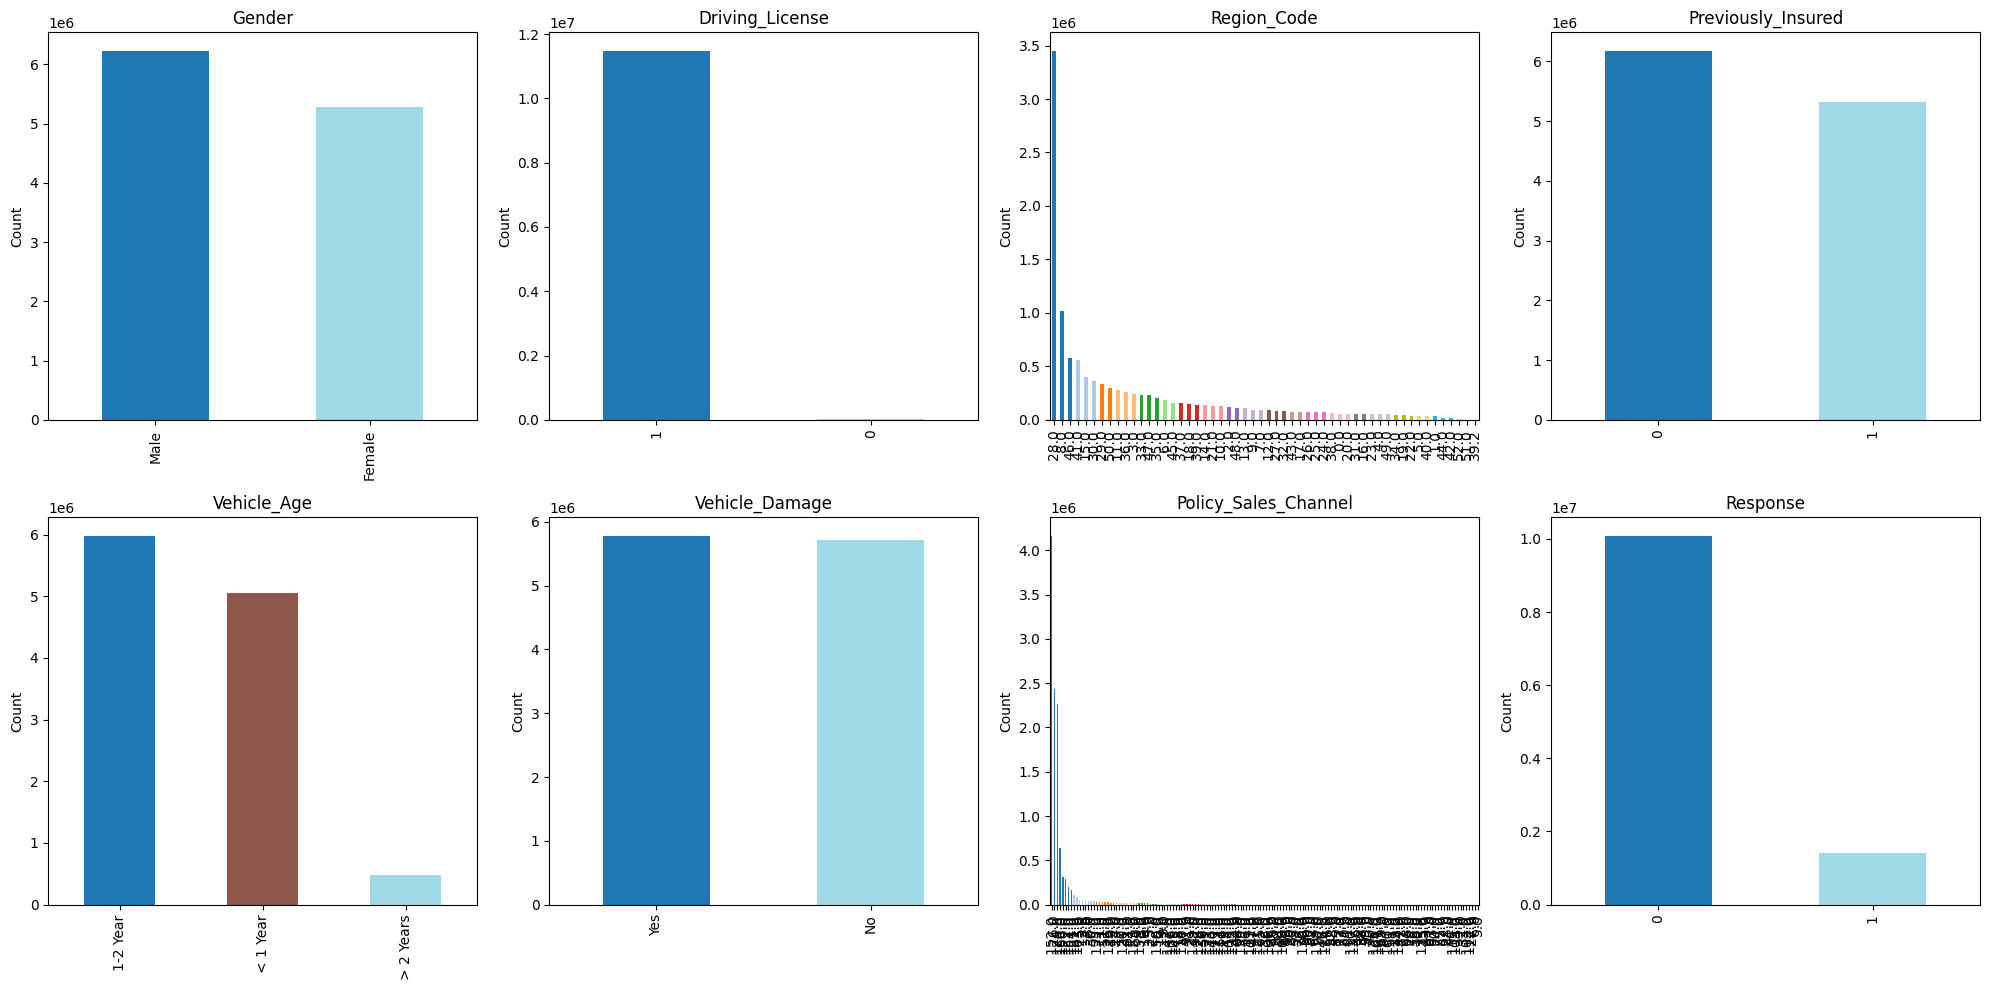

In [7]:
# train_data의 Gender 변수(범주형) 분포 시각화

import matplotlib.pyplot as plt

def plot_category_counts(ax, category_counts, title=None):
    cmap = plt.get_cmap('tab20')
    colors = cmap(np.linspace(0, 1, len(category_counts)))
    category_counts.plot(kind='bar', color=colors, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('')  # x축 라벨 제거
    ax.set_ylabel('Count')

# 범주형 변수를 선택
categorical_columns = train_data.select_dtypes(include='object').columns
num_plots = len(categorical_columns)
num_cols = 4  # 한 줄에 4개의 서브플롯
num_rows = (num_plots + num_cols - 1) // num_cols  # 필요한 행의 수 계산

# 서브플롯 생성
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# 서브플롯에 각 변수의 분포 시각화
for i, column in enumerate(categorical_columns):
    category_counts = train_data[column].value_counts()
    row = i // num_cols
    col = i % num_cols
    plot_category_counts(axs[row, col], category_counts, title=column)

# 나머지 빈 서브플롯 숨기기
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()



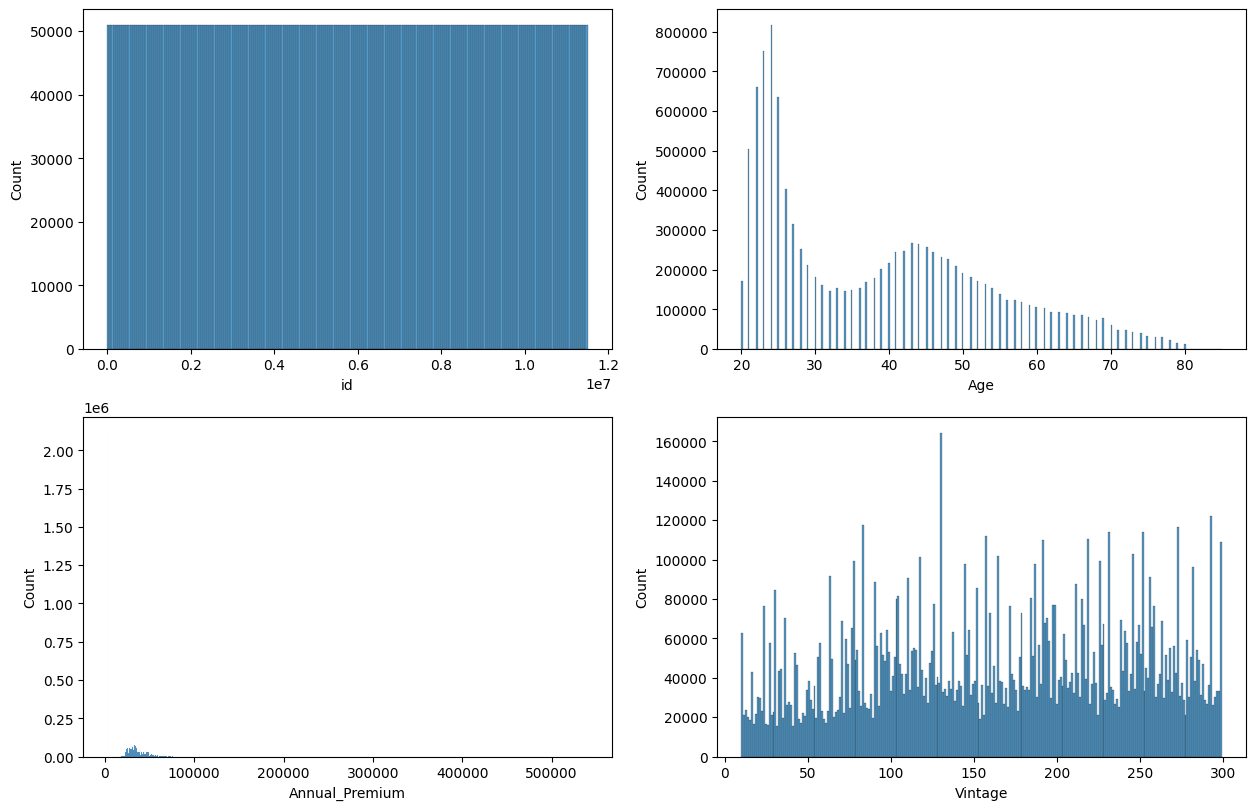

In [8]:
# 데이터 수치형 변수 분포 시각화
plt.figure(figsize=(15, 15))
for i, col in enumerate(train_data.select_dtypes(exclude='object').columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=col, data=train_data)

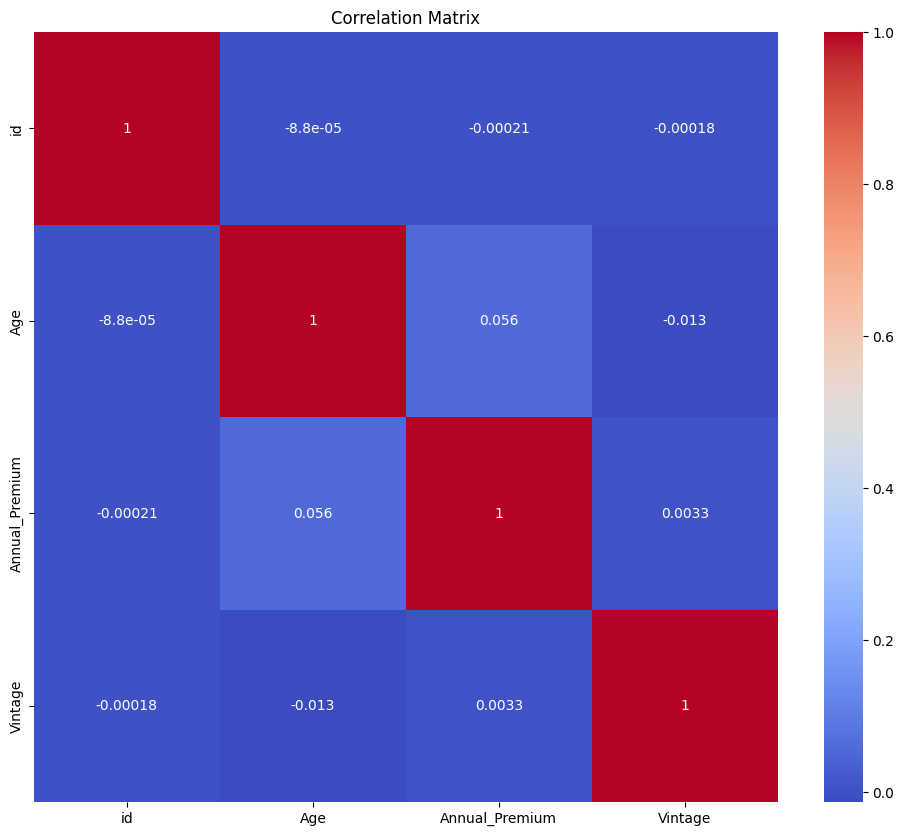

In [9]:
# 수치형 변수의 상관관계 분석 -> 다중공선성 문제를 방지하기 위함.
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 수치형 변수만 선택
X = train_data.select_dtypes(exclude='object')

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


          feature       VIF
0              id  3.324815
1             Age  4.943122
2  Annual_Premium  3.718375
3         Vintage  3.939659


# 변수 2개 시각화

In [11]:
train_data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

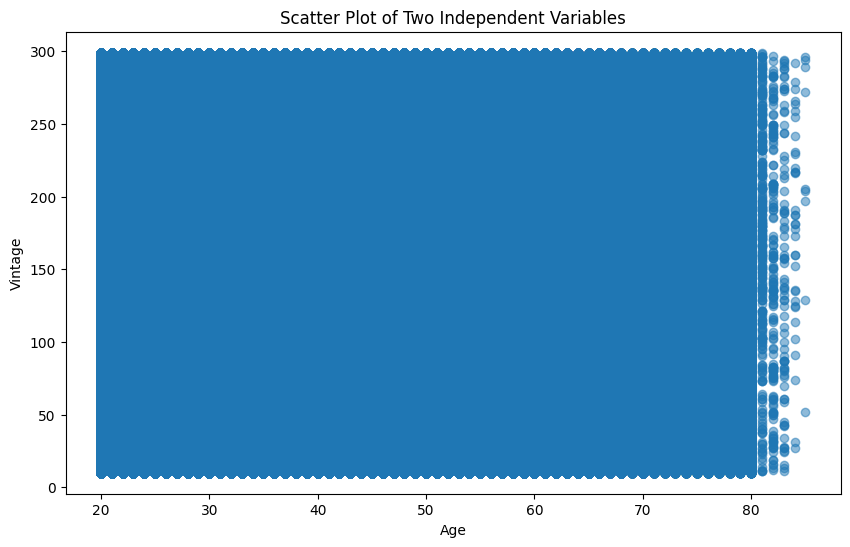

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 로드

# 두 개의 독립 변수 선택
x = train_data['Age']
y = train_data['Vintage']

# 산점도 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot of Two Independent Variables')
plt.xlabel('Age')
plt.ylabel('Vintage')
plt.show()
